# Importing Libraries

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [1]:
pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\Users\ayush\anaconda3\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
Note: you may need to restart the kernel to use updated packages.


## Data Preprocessing

### Training Image Preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [26]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [27]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [28]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[180.25 174.25 176.25]
   [183.5  177.5  179.5 ]
   [186.   180.   182.  ]
   ...
   [187.25 187.75 189.75]
   [191.5  186.5  192.5 ]
   [191.25 184.25 192.25]]

  [[180.25 174.25 176.25]
   [191.25 185.25 187.25]
   [187.5  181.5  183.5 ]
   ...
   [193.75 194.25 196.25]
   [191.5  186.5  192.5 ]
   [195.25 188.25 196.25]]

  [[185.5  179.5  181.5 ]
   [190.25 184.25 186.25]
   [195.75 189.75 191.75]
   ...
   [194.25 194.5  196.5 ]
   [190.25 186.   191.75]
   [194.75 187.75 195.75]]

  ...

  [[127.5  112.5  106.5 ]
   [122.75 103.75 107.25]
   [131.   110.   119.  ]
   ...
   [139.   126.   133.  ]
   [154.25 141.25 148.25]
   [142.5  129.5  136.5 ]]

  [[135.75 120.75 116.75]
   [126.75 107.75 111.75]
   [125.75 104.75 113.75]
   ...
   [141.5  128.5  135.5 ]
   [152.5  139.5  146.5 ]
   [140.5  127.5  134.5 ]]

  [[122.75 107.75 103.75]
   [130.75 111.75 115.75]
   [126.25 105.25 114.25]
   ...
   [129.   116.   123.  ]
   [155.   142.   149.  ]
   [142.   129.   13

### To Avoid Overshooting:

1. **Use a Small Learning Rate**  
   - A large learning rate can cause the model to overshoot the optimal point during training. Start with a small learning rate, e.g., **`0.001`**, and if needed, go smaller (e.g., **`0.0001`**). Using learning rate schedulers can also help dynamically adjust the learning rate during training.

2. **Address Underfitting by Increasing Neurons**  
   - If the model underfits (fails to capture the underlying patterns), consider increasing the number of neurons in the dense layers. This allows the model to learn more complex representations.

3. **Add More Convolutional Layers**  
   - Adding additional convolutional layers helps the model extract more detailed and hierarchical features from the images.  
   - If the model is unable to capture relevant features or is confusing between classes, adding more layers with appropriate filter sizes can help it learn better. However, ensure you monitor for overfitting by using techniques like dropout or batch normalization.

---

### Additional Suggestions:

- **Use Batch Normalization:** This helps stabilize and speed up the training process and prevents overshooting by normalizing layer inputs.
- **Monitor with Validation Metrics:** Regularly evaluate the model on a validation set to ensure it’s improving and not overshooting.
- **Apply Early Stopping:** Set up early stopping to prevent the model from over-training, which could lead to worse performance.
ges

## Building Model

In [29]:
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D,Flatten
from tensorflow.keras.models import Sequential

In [30]:
cnn = tf.keras.models.Sequential()

In [31]:
import numpy as np

### Building Convolution Layer

In [32]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [33]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [34]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [35]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [36]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [37]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [38]:
cnn.add(tf.keras.layers.Flatten())

In [39]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [40]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [41]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

### Compiling and Training Phasee

In [43]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [44]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape          ┃      Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)            │ (None, 128, 128, 32)  │          896 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_11 (Conv2D)            │ (None, 126, 126, 32)  │        9,248 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_5               │ (None, 63, 63, 32)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_12 (Conv2D)            │ (None, 63, 63, 64)    │       18,496 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_13 (Conv2D)            │ (None, 61, 61, 64)    │       36,928 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_6               │ (None, 30, 30, 64)    │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_14 (Conv2D)            │ (None, 30, 30, 128)   │       73,856 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_15 (Conv2D)            │ (None, 28, 28, 128)   │      147,584 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_7               │ (None, 14, 14, 128)   │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_16 (Conv2D)            │ (None, 14, 14, 256)   │      295,168 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_17 (Conv2D)            │ (None, 12, 12, 256)   │      590,080 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_8               │ (None, 6, 6, 256)     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_18 (Conv2D)            │ (None, 6, 6, 512)     │    1,180,160 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ conv2d_19 (Conv2D)            │ (None, 4, 4, 512)     │    2,359,808 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ max_pooling2d_9               │ (None, 2, 2, 512)     │            0 │
│ (MaxPooling2D)                │                       │              │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout (Dropout)             │ (None, 2, 2, 512)     │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ flatten_1 (Flatten)           │ (None, 2048)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_2 (Dense)               │ (None, 1500)          │    3,073,500 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dropout_1 (Dropout)           │ (None, 1500)          │            0 │
├───────────────────────────────┼───────────────────────┼──────────────┤
│ dense_3 (Dense)               │ (None, 38)            │       57,038 │
└───────────────────────────────┴───────────────────────┴──────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [45]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1891s 859ms/step - accuracy: 0.3720 - loss: 2.2434 - val_accuracy: 0.8147 - val_loss: 0.5711
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2017s 918ms/step - accuracy: 0.8249 - loss: 0.5562 - val_accuracy: 0.8993 - val_loss: 0.3072
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1873s 852ms/step - accuracy: 0.9011 - loss: 0.3109 - val_accuracy: 0.9064 - val_loss: 0.2978
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1399s 637ms/step - accuracy: 0.9327 - loss: 0.2022 - val_accuracy: 0.9435 - val_loss: 0.1739
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 154719s 70s/step - accuracy: 0.9497 - loss: 0.1526 - val_accuracy: 0.9550 - val_loss: 0.1410
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1738s 791ms/step - accuracy: 0.9619 - loss: 0.1129 - val_accuracy: 0.9602 - val_loss: 0.1264
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1688s 768ms/step - accuracy: 0.9692 - loss: 0.0940 - val_accuracy: 0.9579 - val_loss: 0.1392
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1724s 784ms/s

## 
Evaluating Model

In [46]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 404s 184ms/step - accuracy: 0.9878 - loss: 0.0382
Training accuracy: 0.9890745878219604


## Saving Model

In [47]:
cnn.save('trained_plant_disease_model.keras')

In [48]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5769400596618652,
  0.8515541553497314,
  0.9101927876472473,
  0.9377622604370117,
  0.9522867798805237,
  0.9641653299331665,
  0.970154345035553,
  0.9754605293273926,
  0.9772956967353821,
  0.9814496040344238],
 'loss': [1.4435882568359375,
  0.46869441866874695,
  0.27958765625953674,
  0.18694645166397095,
  0.1448267698287964,
  0.10813528299331665,
  0.09007015079259872,
  0.07410711795091629,
  0.06843312084674835,
  0.05695149675011635],
 'val_accuracy': [0.8147051930427551,
  0.899271547794342,
  0.9063851833343506,
  0.943489670753479,
  0.9549852013587952,
  0.9601638913154602,
  0.9579444527626038,
  0.9594240784645081,
  0.9649442434310913,
  0.9612451791763306],
 'val_loss': [0.5710879564285278,
  0.30722320079803467,
  0.2977878153324127,
  0.17388838529586792,
  0.1410094052553177,
  0.12643299996852875,
  0.13915672898292542,
  0.14486713707447052,
  0.1220630332827568,
  0.13452650606632233]}

In [49]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [50]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


## 
Accuracy Visualization

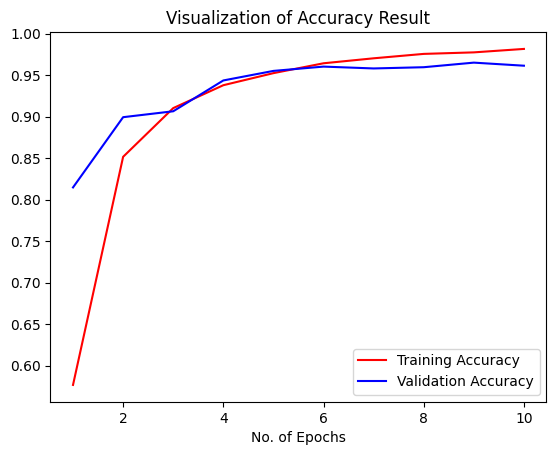

In [51]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

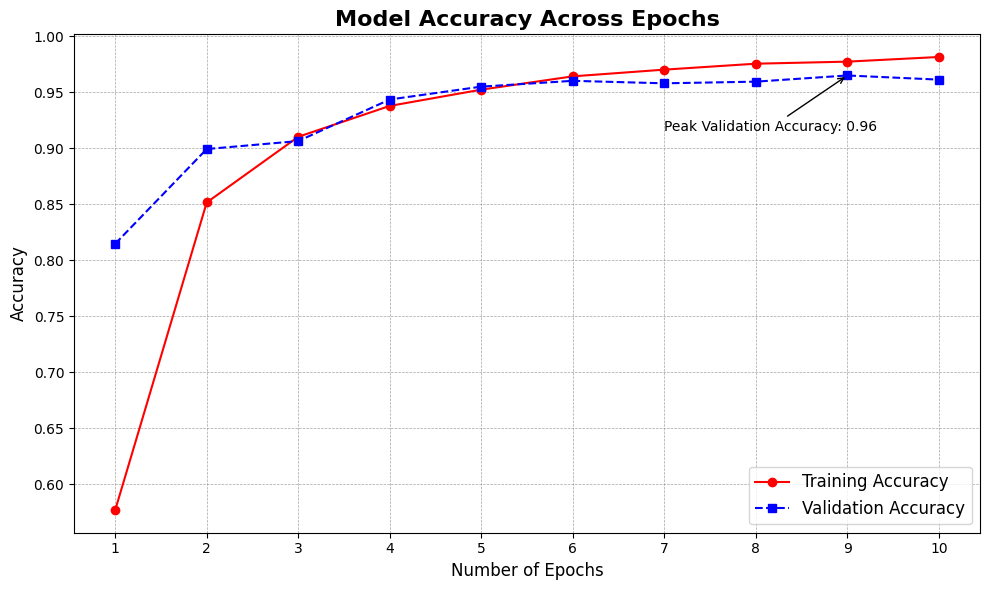

In [55]:
epochs = [i for i in range(1, 11)]

# Plotting
plt.figure(figsize=(10, 6))  # Bigger plot for better readability
plt.plot(epochs, training_history.history['accuracy'], color='red', 
         marker='o', linestyle='-', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', 
         marker='s', linestyle='--', label='Validation Accuracy')

# Enhancements
plt.title('Model Accuracy Across Epochs', fontsize=16, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(epochs, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)  # Add grid
plt.legend(fontsize=12, loc='lower right')  # Adjust legend position

# Highlight specific points (optional)
max_val_acc = max(training_history.history['val_accuracy'])
max_val_epoch = training_history.history['val_accuracy'].index(max_val_acc) + 1
plt.annotate(f'Peak Validation Accuracy: {max_val_acc:.2f}', 
             xy=(max_val_epoch, max_val_acc), 
             xytext=(max_val_epoch - 2, max_val_acc - 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'), 
             fontsize=10)

# Show the plot
plt.tight_layout()  # Adjust layout to fit elements
plt.show()

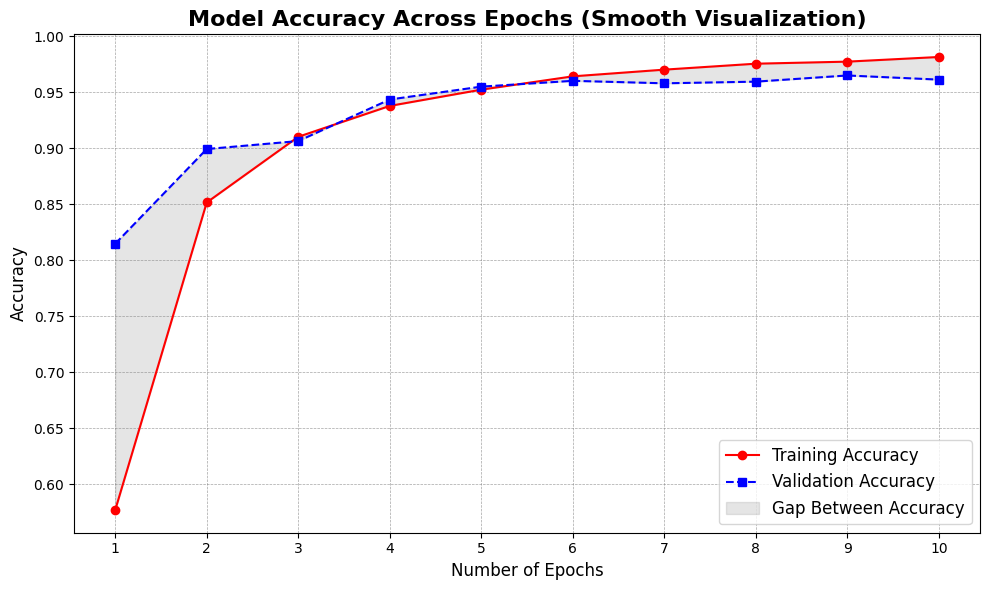

In [56]:
# Example data
epochs = np.arange(1, 11)
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, color='red', label='Training Accuracy', marker='o', linestyle='-')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy', marker='s', linestyle='--')

# Fill area between lines
plt.fill_between(epochs, train_acc, val_acc, color='gray', alpha=0.2, label='Gap Between Accuracy')

# Customizations
plt.title('Model Accuracy Across Epochs (Smooth Visualization)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(epochs, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12, loc='lower right')
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

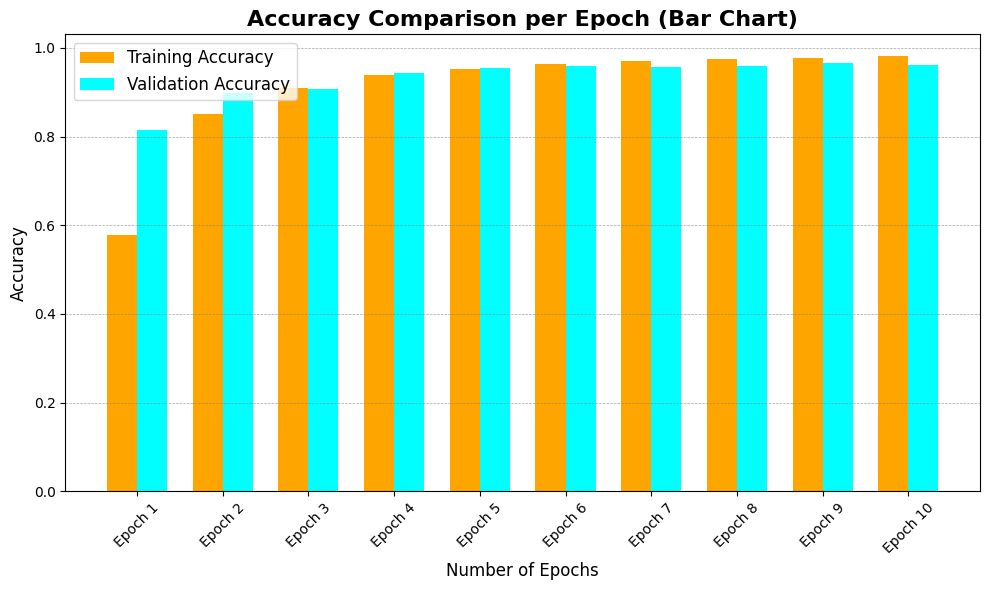

In [57]:
width = 0.35  # Bar width
x = np.arange(len(epochs))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, training_history.history['accuracy'], width, label='Training Accuracy', color='orange')
plt.bar(x + width/2, training_history.history['val_accuracy'], width, label='Validation Accuracy', color='cyan')

# Customizations
plt.title('Accuracy Comparison per Epoch (Bar Chart)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(x, [f'Epoch {i}' for i in epochs], rotation=45, fontsize=10)
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7, axis='y')

plt.tight_layout()
plt.show()


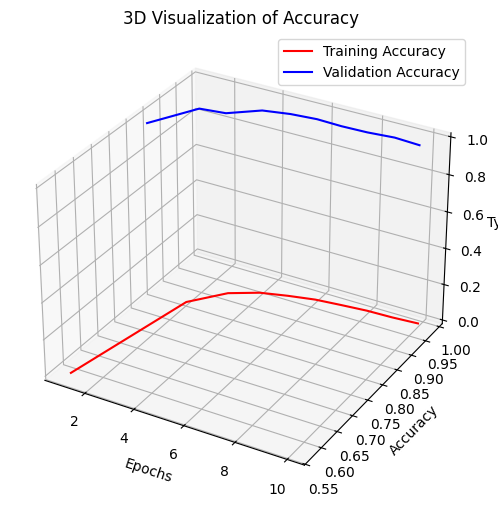

In [60]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plotting
ax.plot(epochs, training_history.history['accuracy'], zs=0, zdir='z', label='Training Accuracy', color='red')
ax.plot(epochs, training_history.history['val_accuracy'], zs=1, zdir='z', label='Validation Accuracy', color='blue')

# Customizations
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_zlabel('Type')
ax.set_title('3D Visualization of Accuracy')
ax.legend()

plt.show()


## Some other metrics for model evaluation

In [61]:
class_name = validation_set.class_names

In [73]:
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [62]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [63]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)


17572/17572 ━━━━━━━━━━━━━━━━━━━━ 321s 18ms/step


In [64]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [65]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [66]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [68]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/96/a2/cbfb5743de748d574ffdfd557e9cb29ba4f8b8a3e07836c6c176f713de2f/scikit_learn-1.6.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/ea/c2/5ecadc5fcccefaece775feadcd795060adf5c3b29a883bff0e678cfe89af/scipy-1.14.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.8 kB 1.3 MB/s eta 0:00:01
     -------------------- ------------------- 30.7/60.8 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 404.3 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [69]:
import sklearn
print(sklearn.__version__)

1.6.0


In [70]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [71]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.97      0.97       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.97      1.00      0.98       440
                                   Apple___healthy       0.97      0.95      0.96       502
                               Blueberry___healthy       0.99      0.96      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.95      0.97       421
                 Cherry_(including_sour)___healthy       0.88      1.00      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.93      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

## Confusion Matrix Visualization


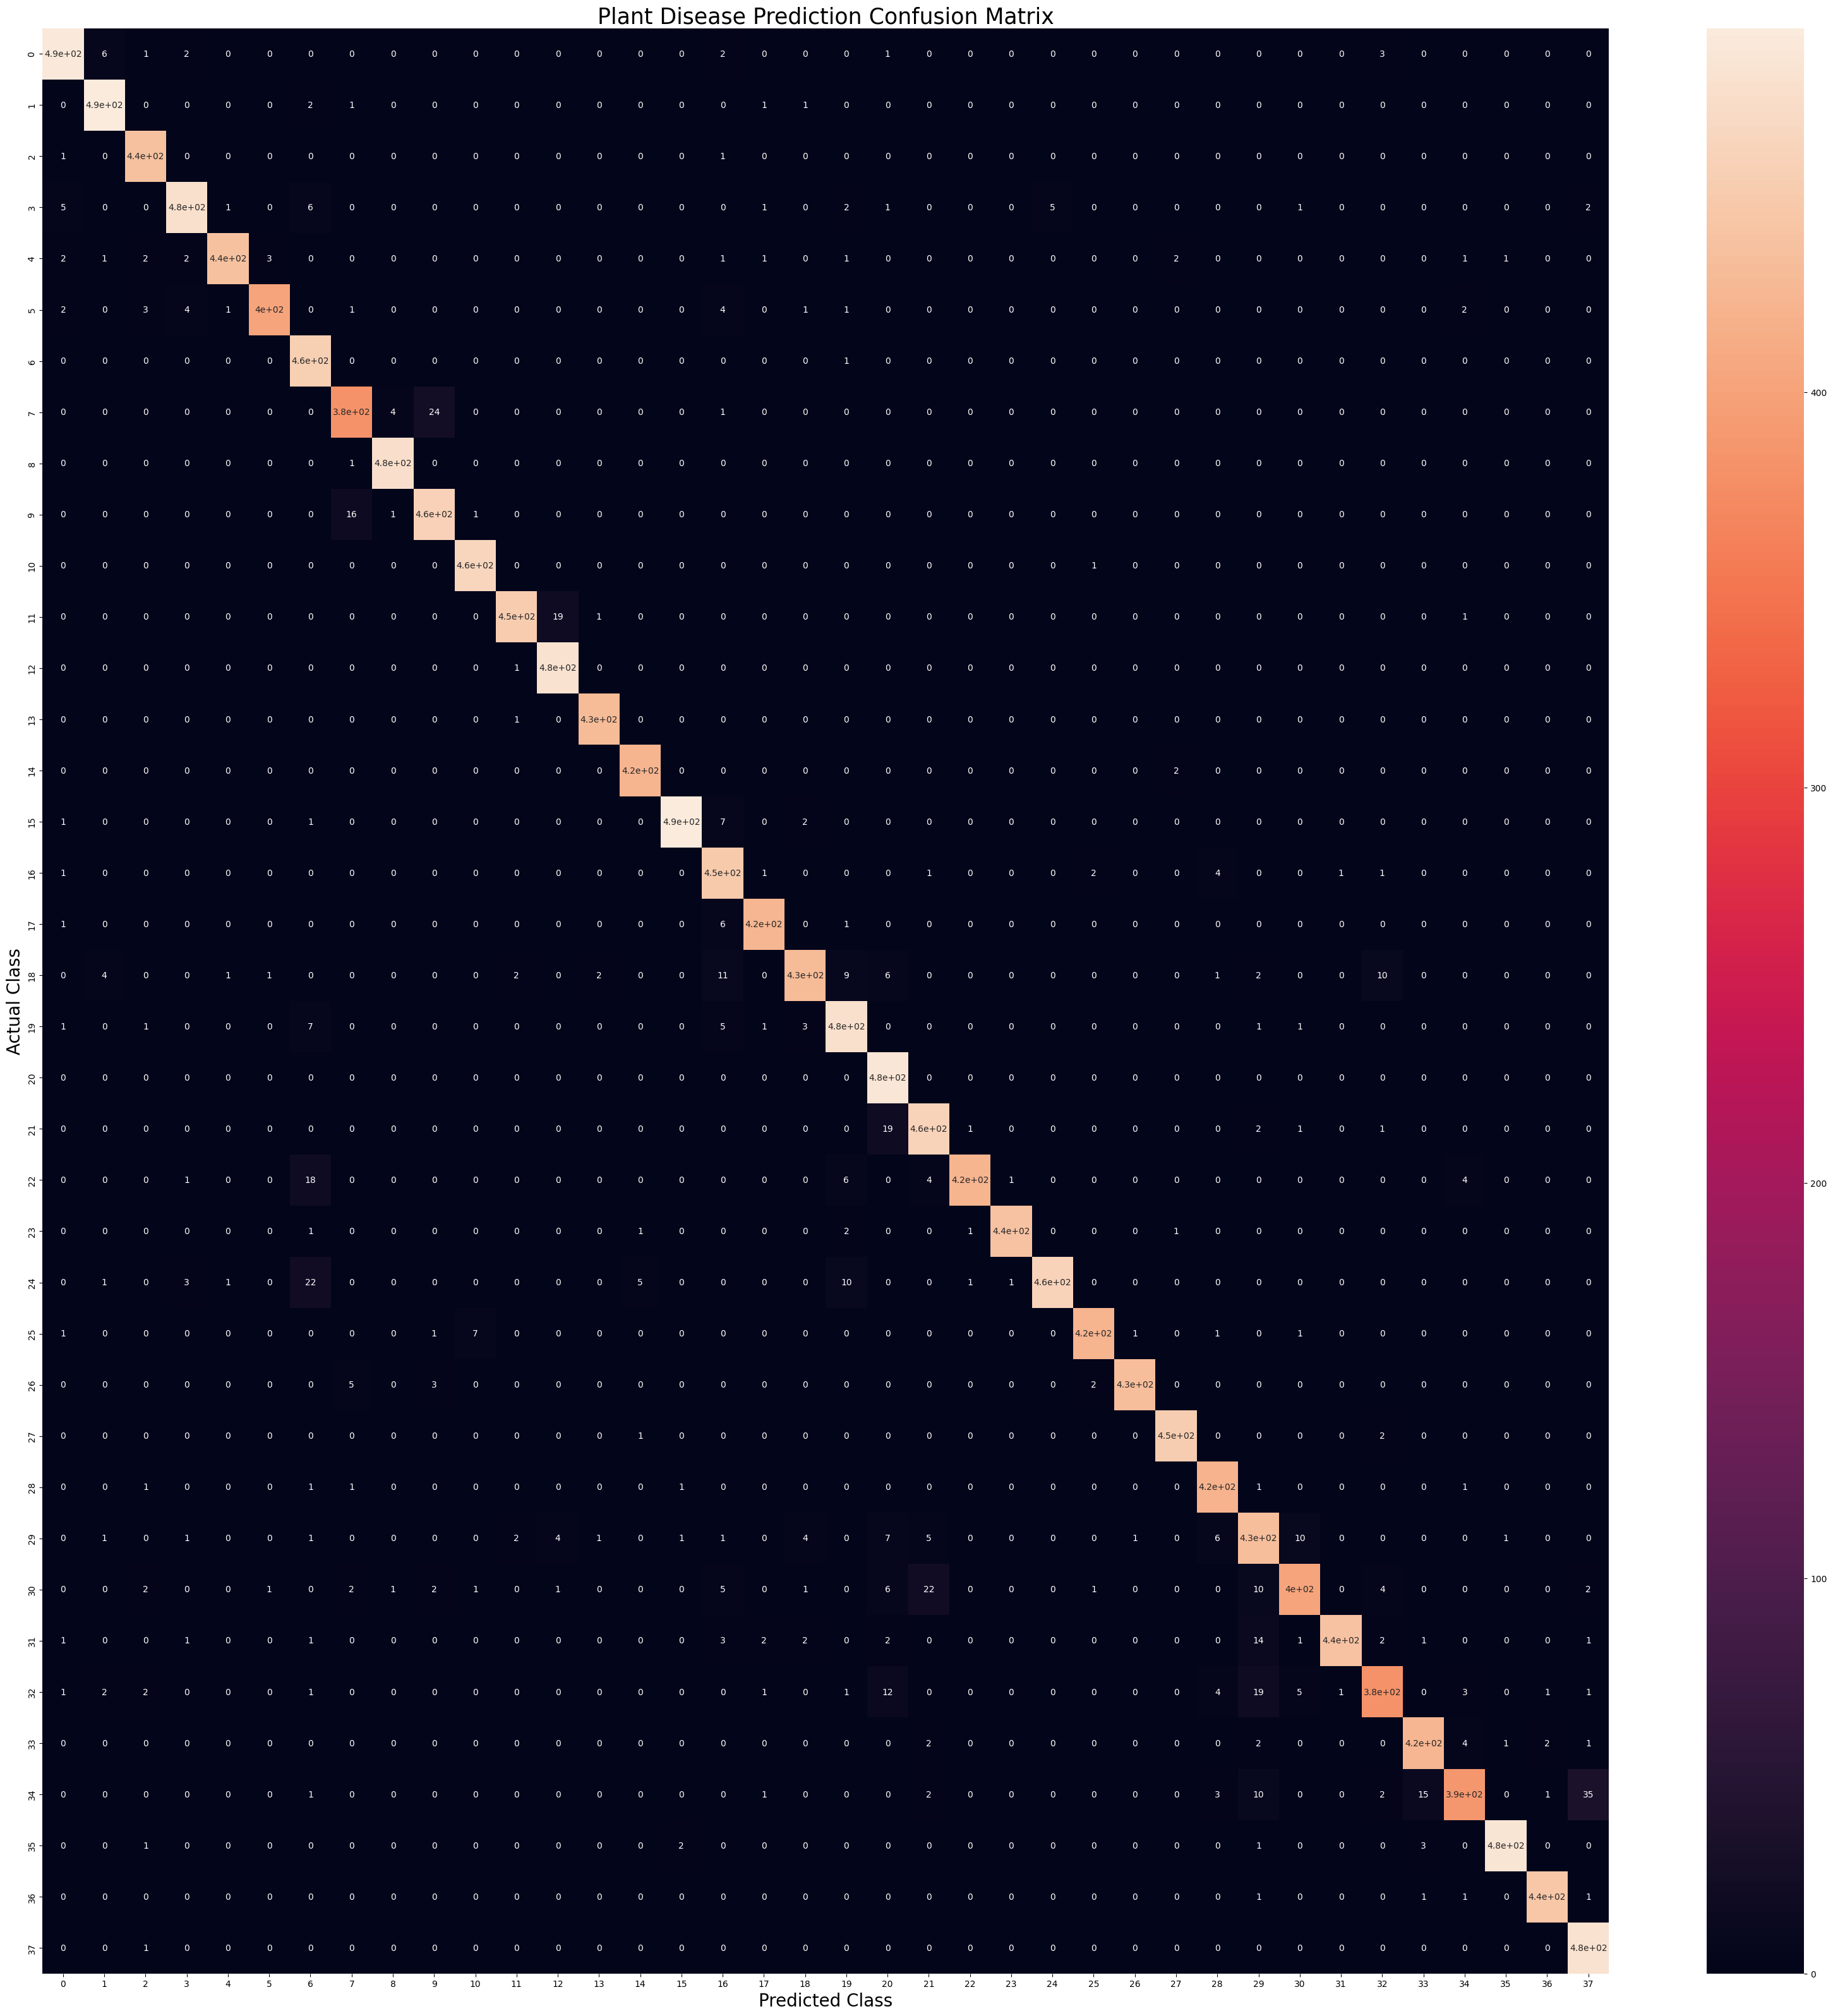

In [72]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()